## Feature check

In [39]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
eval_path = "/data2/cehou/LLM_safety/LLM_models/safety_perception_model/multimodal/diff_concat_20241229"
cfg_record_list = glob(f"{eval_path}/*/*.csv")
cfg_record_list = set(cfg_record_list) - set(glob(f"{eval_path}/lr_*_LLM_feature_process_*/*.csv"))

for i, cfg_path in enumerate(cfg_record_list):
    if i == 0:
        cfg_df = pd.read_csv(cfg_path)
    else:
        cfg_df = pd.concat([cfg_df, pd.read_csv(cfg_path)])

if 'Unnamed: 0' in cfg_df.columns:
    cfg_df.drop(columns=["Unnamed: 0"], inplace=True)
cfg_df_summary = cfg_df.drop_duplicates(subset='safety_model_save_name', keep='last').reset_index(drop=True)

# # cfg_df.reset_index(drop=True, inplace=True)
# cfg_df = cfg_df.drop_duplicates().reset_index(drop=True)
# cfg_df['image_encoder_lr'] = cfg_df['image_encoder_lr'].round(8)
# cfg_df['text_encoder_lr'] = cfg_df['text_encoder_lr'].round(8)

In [52]:
cfg_df_summary.head()

,train_type,placepulse_datapath,safety_save_path,safety_model_save_name,subfolder_name,num_epochs,visual_feature_extractor,text_feature_extractor,batch_size,image_input_dim,...,mix_process,mixer_output_dim,num_classes,lr,LLM_loaded,LLM_image_feature_process,train_loss_list,val_loss_list,accuracy,f1_score
0,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_1e-05_adaptor_output_dim_256...,lr_1e-05_adaptor_output_dim_256_mix_process_co...,399,ViT,Bert,128,768,...,concat,512,2,1.000000e-05,False,mean_dim1,0.589953,0.647992,0.648410,0.646085
1,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_1e-07_adaptor_output_dim_256...,lr_1e-07_adaptor_output_dim_256_mix_process_cr...,399,ViT,Bert,128,768,...,cross_attention,256,2,1.000000e-07,False,mean_dim1,0.711375,0.696521,0.561837,0.526231
2,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_0.0001_adaptor_output_dim_10...,lr_0.0001_adaptor_output_dim_1024_mix_process_...,399,ViT,Bert,128,768,...,cross_attention,1024,2,1.000000e-04,False,mean_dim1,0.718077,0.729042,0.477032,0.476861
3,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_1e-07_adaptor_output_dim_102...,lr_1e-07_adaptor_output_dim_1024_mix_process_c...,399,ViT,Bert,128,768,...,cross_attention,1024,2,1.000000e-07,False,mean_dim1,0.711531,0.705245,0.586572,0.552976
4,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_0.001_adaptor_output_dim_512...,lr_0.001_adaptor_output_dim_512_mix_process_co...,399,ViT,Bert,128,768,...,concat,1024,2,1.000000e-03,False,mean_dim1,0.655953,0.697313,0.563604,0.544985


In [56]:
cfg_df_summary.sort_values(by='f1_score', ascending=False).head()

,train_type,placepulse_datapath,safety_save_path,safety_model_save_name,subfolder_name,num_epochs,visual_feature_extractor,text_feature_extractor,batch_size,image_input_dim,...,mix_process,mixer_output_dim,num_classes,lr,LLM_loaded,LLM_image_feature_process,train_loss_list,val_loss_list,accuracy,f1_score
37,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_0.0001_adaptor_output_dim_51...,lr_0.0001_adaptor_output_dim_512_mix_process_c...,399,ViT,Bert,128,768,...,concat,1024,2,0.00010,False,mean_dim1,0.554848,0.646581,0.651943,0.648902
49,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_1e-05_adaptor_output_dim_512...,lr_1e-05_adaptor_output_dim_512_mix_process_co...,399,ViT,Bert,128,768,...,concat,1024,2,0.00001,False,mean_dim1,0.570373,0.648596,0.653710,0.646683
0,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_1e-05_adaptor_output_dim_256...,lr_1e-05_adaptor_output_dim_256_mix_process_co...,399,ViT,Bert,128,768,...,concat,512,2,0.00001,False,mean_dim1,0.589953,0.647992,0.648410,0.646085
53,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_1e-05_adaptor_output_dim_102...,lr_1e-05_adaptor_output_dim_1024_mix_process_c...,399,ViT,Bert,128,768,...,concat,2048,2,0.00001,False,mean_dim1,0.577958,0.651988,0.646643,0.640232
6,classification,/data2/cehou/LLM_safety/img_text_data/baseline...,/data2/cehou/LLM_safety/LLM_models/safety_perc...,model_baseline_lr_0.0001_adaptor_output_dim_10...,lr_0.0001_adaptor_output_dim_1024_mix_process_...,399,ViT,Bert,128,768,...,concat,2048,2,0.00010,False,mean_dim1,0.574091,0.650730,0.637809,0.634644


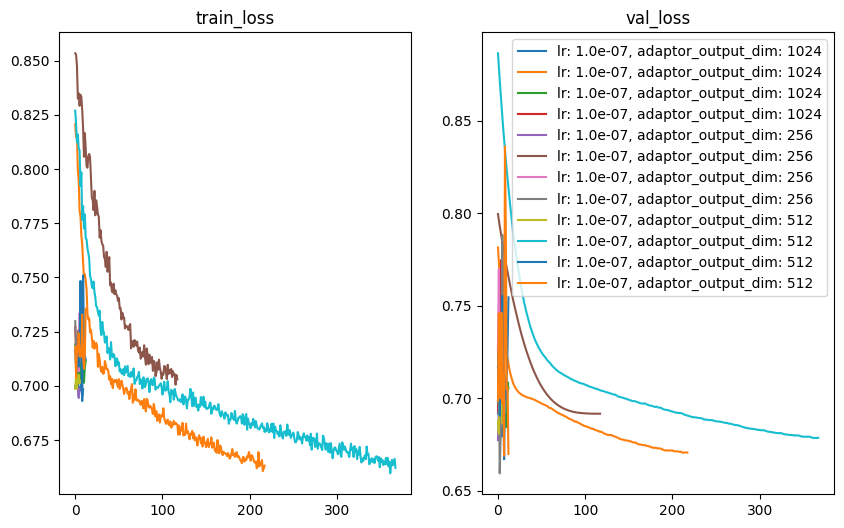

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
cfg_df_group = cfg_df.groupby('safety_model_save_name')
for name, group in cfg_df_group:
    
    if group.loc[0, 'lr'] != 1e-7:
        continue
    else:
        # ax[0].plot( group['train_loss_list'], label=f"lr: {group['lr'].values[0]}, mix process: {group['mix_process'].values[0]}")
        # ax[1].plot(group['val_loss_list'], label=f"lr: {group['lr'].values[0]:.1e}, mix_process: {group['mix_process'].values[0]}")

        ax[0].plot( group['train_loss_list'], label=f"lr: {group['lr'].values[0]}, adaptor_output_dim: {group['adaptor_output_dim'].values[0]}")
        ax[1].plot(group['val_loss_list'], label=f"lr: {group['lr'].values[0]:.1e}, adaptor_output_dim: {group['adaptor_output_dim'].values[0]}")
ax[0].set_title('train_loss')
ax[1].set_title('val_loss')
plt.legend()
plt.show()

Text(0.5, 1.0, 'F1 score heatmap')

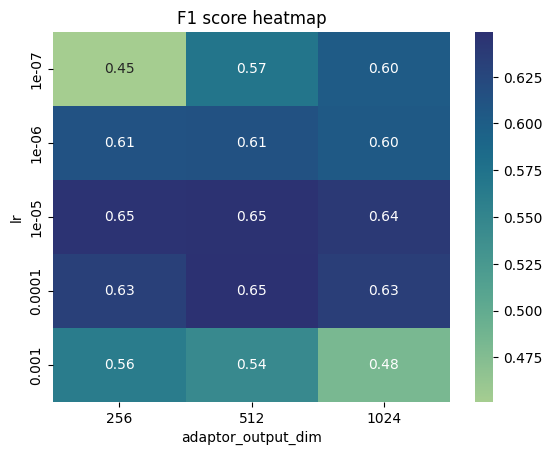

In [51]:
# cfg_df_summary.pivot_table(values='f1_score', index='LLM_feature_process', columns='lr').reset_index()

final_pivot = cfg_df_summary[cfg_df_summary['mix_process'] == "concat"].pivot_table(values='f1_score', index='lr', columns='adaptor_output_dim').reset_index()
sns.heatmap(final_pivot.set_index('lr'), annot=True, fmt=".2f", cmap='crest')
plt.title('F1 score heatmap')

In [ ]:
import shutil
import os
from glob import glob

# source_folder = glob('/data2/cehou/LLM_safety/LLM_models/safety_perception_model/only_img/*_LLM_loaded_False')
source_folder = [i[:-15] for i in cfg_record_list]
destination_folder = '/data2/cehou/LLM_safety/LLM_models/safety_perception_model/only_img/with_LLM_extractor_dim1'



# 遍历源文件夹中的所有文件并移动到目标文件夹
for filename in source_folder:
    destination_path = os.path.join(destination_folder, filename.split('/')[-1])
    if not os.path.exists(destination_path):
        os.makedirs(destination_path, exist_ok=True)
        for file in glob(filename + '/*'):
            shutil.move(file, destination_path)
print("文件移动完成")

In [23]:
train_loss_path =  glob(f"{eval_path}/*/train_loss.npy")
valid_loss_path = [train_loss.replace("train_loss", "valid_loss") for train_loss in train_loss_path]

train_loss_list = [np.load(train_loss) for train_loss in train_loss_path]
valid_loss_list = [np.load(valid_loss) for valid_loss in valid_loss_path]
image_encode_lr = [float(train_loss_path[i].split("/")[-2].split("_")[3]) for i in range(len(train_loss_path))]
text_encode_lr = [float(train_loss_path[i].split("/")[-2].split("_")[7]) for i in range(len(train_loss_path))]
final_train_loss = [train_loss[-1] for train_loss in train_loss_list]
final_valid_loss = [valid_loss[-1] for valid_loss in valid_loss_list]
step_num = [len(train_loss) for train_loss in train_loss_list]

loss_df  = pd.DataFrame({"image_encoder_lr": image_encode_lr, 
                         "text_encoder_lr": text_encode_lr, 
                         "train_loss": train_loss_list, 
                         "valid_loss": valid_loss_list,
                         "final_train_loss": final_train_loss,
                         "final_valid_loss": final_valid_loss,
                         "step_num": step_num})

loss_df['image_encoder_lr'] = loss_df['image_encoder_lr'].round(8)
loss_df['text_encoder_lr'] = loss_df['text_encoder_lr'].round(8)

In [24]:
cfg_df_merged = cfg_df.merge(loss_df, on=['image_encoder_lr', 'text_encoder_lr'], how='left')

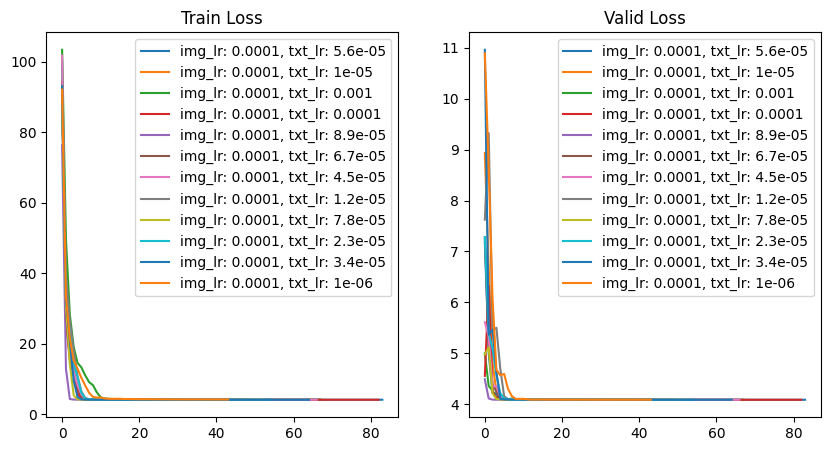

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

for i in loss_df[loss_df['image_encoder_lr'] == 0.0001].index:
    ax[0].plot(loss_df.loc[i,"train_loss"], label=f"img_lr: {loss_df.loc[i,'image_encoder_lr']}, txt_lr: {loss_df.loc[i,'text_encoder_lr']}")
    ax[1].plot(loss_df.loc[i,"valid_loss"], label=f"img_lr: {loss_df.loc[i,'image_encoder_lr']}, txt_lr: {loss_df.loc[i,'text_encoder_lr']}")

ax[0].set_title("Train Loss")
ax[1].set_title("Valid Loss")
ax[0].legend()
ax[1].legend()
plt.show()

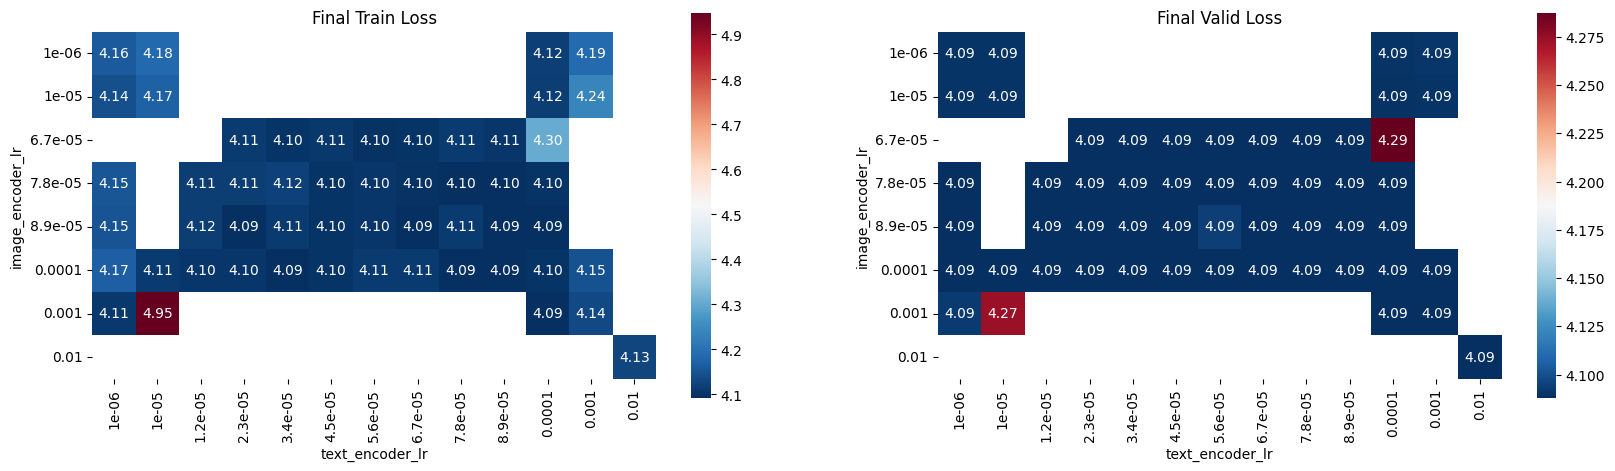

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
final_train_pivot_df = loss_df.pivot_table(values='final_train_loss', index='image_encoder_lr', columns='text_encoder_lr')
final_valid_pivot_df = loss_df.pivot_table(values='final_valid_loss', index='image_encoder_lr', columns='text_encoder_lr')
sns.heatmap(final_train_pivot_df, annot=True, fmt=".2f", cmap='RdBu_r', ax=ax[0],square=True)
sns.heatmap(final_valid_pivot_df, annot=True, fmt=".2f", cmap='RdBu_r', ax=ax[1],square=True)
ax[0].set_title("Final Train Loss")
ax[1].set_title("Final Valid Loss")
plt.show()

In [14]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import sys
from safety_perception_dataset import SafetyPerceptionCLIPDataset
import numpy as np
import pandas as pd
from tqdm import tqdm
import neptune
sys.path.append("/code/LLM-crime/safety_perception_model/single_model")
from my_models import TransformerRegressionModel, FeatureViTClassifier
sys.path.append("/code/LLM-crime")
from custom_clip_train import CLIPModel, CLIPDataset, build_loaders, make_prediction
from transformers import DistilBertModel, DistilBertConfig, DistilBertTokenizer
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

def get_img_feature(paras):
    CLIP_model_path = os.path.join(paras['save_model_path'], paras['save_model_name'])
    save_paths = paras['variables_save_paths']
    if not os.path.exists(save_paths):
        os.makedirs(save_paths)
    text_tokenizer = "distilbert-base-uncased"
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {paras['device']}")

    img_encoder_paras = torch.load(CLIP_model_path)
    img_encoder = CLIPModel(paras)
    img_encoder.load_state_dict(img_encoder_paras)
    baseline_data = pd.read_csv(paras['dataset_path'])
    # print("baseline_data: ", len(baseline_data))
    tokenizer = DistilBertTokenizer.from_pretrained(text_tokenizer)

    data_loader = build_loaders(baseline_data, tokenizer, mode="valid", cfg_paras=paras)

    img_encoder.to(paras['device'])
    img_feature, text_feature = make_prediction(img_encoder, data_loader, cfg_paras=paras) # (datasize, 256)
    img_feature = np.array(img_feature)
    text_feature = np.array(text_feature)

    # Save img_feature to a file
    np.save(os.path.join(save_paths, 'img_feature.npy'), img_feature)
    np.save(os.path.join(save_paths, 'text_feature.npy'), text_feature)
    return img_feature, text_feature

cfg_paras = {
    'debug':False,
    # 'dataset_path':"/data2/cehou/LLM_safety/img_text_data/dataset_baseline_baseline_baseline_baseline_1401.pkl",
    'dataset_path':'/data2/cehou/LLM_safety/img_text_data/baseline/tidyed/dataset_baseline_baseline_baseline_baseline_9030_withlabel.csv',
    'save_model_path':"/data_nas/cehou/LLM_safety/LLM_models/clip_model/test",
    'save_model_name':"model_baseline_test.pt",
    'device':torch.device("cuda:3" if torch.cuda.is_available() else "cpu"),
    'CLIP_train_type': 'train', # train, finetune
    'batch_size':60,
    'num_workers':4,
    'head_lr':1e-3,
    'temperature':0.05,
    'image_encoder_lr':0.000100,
    'text_encoder_lr':0.000045,
    'weight_decay':1e-3,
    'img_type':'PlacePulse',
    'patience':1,
    'factor':0.8,
    'epochs':999,
    'image_embedding':768,
    'text_embedding':768,
    'max_length':512,
    'size':(112,112),
    
    # models for image and text
    'ml_model':'RandomForest',
    'model_name':'resnet50',
    'text_encoder_model':"distilbert-base-uncased",
    'text_tokenizer': "distilbert-base-uncased",
    'pretrained':True,
    'trainable':True,
    
    # deep learning model parameters
    'projection_dim':256,
    'dropout':0.1,
    'early_stopping_threshold':5,
    
    # safety perception
    # 'CLIP_model_path': "/data2/cehou/LLM_safety/LLM_models/clip_model/test/model_baseline_best.pt",
    'variables_save_paths': f"/data2/cehou/LLM_safety/middle_variables/test",
    'safety_model_save_path' : f"/data2/cehou/LLM_safety/LLM_models/safety_perception_model/",
    'placepulse_datapath': "/data2/cehou/LLM_safety/PlacePulse2.0/image_perception_score.csv",
    'eval_path': "/data2/cehou/LLM_safety/eval/test/",
    'train_type': 'classification',
    'safety_epochs': 200,
    'batch_size_safety': 256,
    'CNN_lr': 1e-2,
    }


best_line = cfg_df.sort_values(by=['accuracy'], ascending=False).iloc[0]

best_line['device'] = 'cuda:0'
cfg_paras['save_model_path'] = best_line['save_model_path']
torch.cuda.empty_cache()

img_feature,text_feature = get_img_feature(cfg_paras)
print(img_feature.shape)
data = pd.read_csv(best_line['placepulse_datapath'])
SVI_namelist = pd.read_csv(best_line['dataset_path'])
namelist = pd.DataFrame([SVI_namelist.loc[i,'Image_ID'] for i in range(len(SVI_namelist))],columns=['Image_ID'])
data = namelist.merge(data[data['Category'] == 'safety'], on='Image_ID')
data_nonezero = data[data['label'] != 0]
data_nonezero_idx = data[data['label'] != 0].index
img_feature_nonezero = img_feature[data_nonezero_idx,:]
data_nonezero = data_nonezero.reset_index(drop=True)
data_nonezero.loc[data_nonezero[data_nonezero['label'] == -1].index,'label'] = 0

# train_len = int(0.7*len(img_feature_nonezero))
# train_dataset = SafetyPerceptionCLIPDataset(data[:train_len], img_feature[:train_len], best_line)
# valid_dataset = SafetyPerceptionCLIPDataset(data[train_len:], img_feature[train_len:], best_line)
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

Using device: cuda:3


FileNotFoundError: [Errno 2] No such file or directory: '/data_nas/cehou/LLM_safety/LLM_models/clip_model/test/model_baseline_test.pt'

In [28]:
data_path = '/data2/cehou/LLM_safety/eval/image_encoder_lr_text_encoder_lr/image_encoder_lr_0.0001_text_encoder_lr_4.4999999999999996e-05'
img_feature = np.load(os.path.join(data_path, 'img_feature.npy'))
text_feature = np.load(os.path.join(data_path, 'text_feature.npy'))

data = pd.read_csv(best_line['placepulse_datapath'])
SVI_namelist = pd.read_csv(best_line['dataset_path'])
namelist = pd.DataFrame([SVI_namelist.loc[i,'Image_ID'] for i in range(len(SVI_namelist))],columns=['Image_ID'])
data = namelist.merge(data[data['Category'] == 'safety'], on='Image_ID')
data_nonezero = data[data['label'] != 0]
data_nonezero_idx = data[data['label'] != 0].index

img_feature_nonezero = img_feature[data_nonezero_idx,:]
text_feature_nonezero = img_feature[data_nonezero_idx,:]


data_nonezero = data_nonezero.reset_index(drop=True)
data_nonezero.loc[data_nonezero[data_nonezero['label'] == -1].index,'label'] = 0


In [31]:
combined_feature_nonezero = np.concatenate((img_feature_nonezero, text_feature_nonezero), axis=1)
combined_feature_nonezero.shape

(5605, 512)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 准备训练和验证数据
train_len = int(0.7*len(combined_feature_nonezero))
X_train = combined_feature_nonezero[:train_len]
y_train = data_nonezero['label'][:train_len]
X_valid = combined_feature_nonezero[train_len:]
y_valid = data_nonezero['label'][train_len:]

# 初始化随机森林分类器
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_valid)

# 打印分类报告和准确率
print("Classification Report:\n", classification_report(y_valid, y_pred))
print("Accuracy:", accuracy_score(y_valid, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.61      0.57       767
           1       0.62      0.54      0.58       915

    accuracy                           0.57      1682
   macro avg       0.57      0.58      0.57      1682
weighted avg       0.58      0.57      0.57      1682

Accuracy: 0.5719381688466112


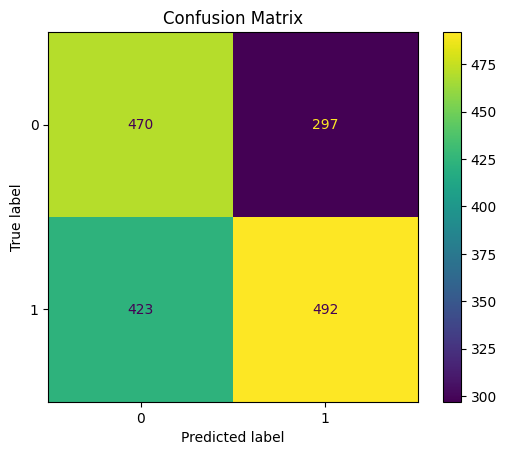

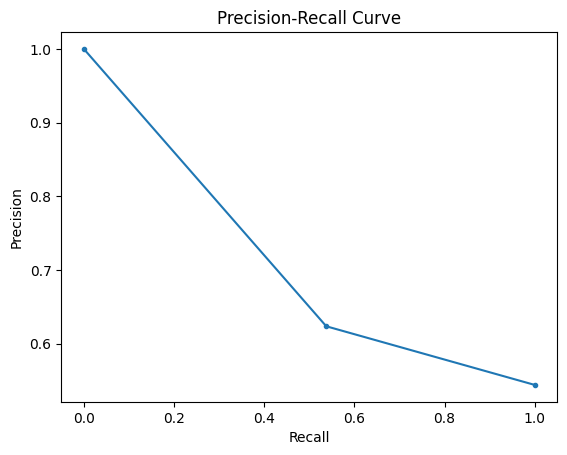

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve

import matplotlib.pyplot as plt

# 绘制混淆矩阵
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 计算precision-recall曲线
precision, recall, _ = precision_recall_curve(y_valid, y_pred)

# 绘制precision-recall曲线
plt.figure()
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Text(0.5, 1.0, 'PCA of Image Feature')

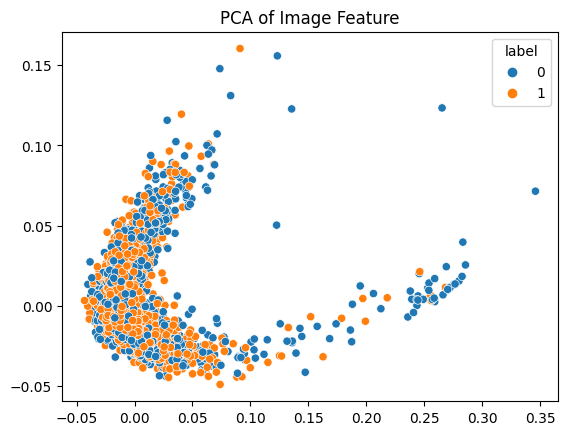

In [36]:
from sklearn.decomposition import PCA

pca_img = PCA(n_components=2)
img_feature_pca = pca_img.fit_transform(combined_feature_nonezero)

sns.scatterplot(x=img_feature_pca[:,0], y=img_feature_pca[:,1], hue=data_nonezero['label'])
plt.title("PCA of Image Feature")

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# 初始化XGBoost分类器
xgb_classifier = XGBClassifier(n_estimators=500, random_state=42)

# 训练模型
xgb_classifier.fit(X_train, y_train)

# 进行预测
y_pred_xgb = xgb_classifier.predict(X_valid)

# 打印分类报告和准确率
print("Classification Report:\n", classification_report(y_valid, y_pred_xgb))
print("Accuracy:", accuracy_score(y_valid, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       767
           1       0.61      0.56      0.59       915

    accuracy                           0.57      1682
   macro avg       0.57      0.57      0.57      1682
weighted avg       0.57      0.57      0.57      1682

Accuracy: 0.5689655172413793


In [5]:
low_idx, high_idx = data_nonezero.sort_values(by='Score').index[0], data_nonezero.sort_values(by='Score').index[-1]

In [10]:
data_nonezero.iloc[low_idx]['Image_ID']

'50f5e56bfdc9f065f00068c5'

<Axes: >

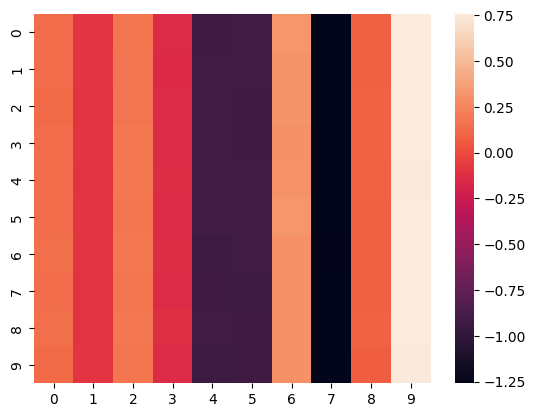

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(text_feature[:10,:10])

In [36]:
from sklearn.decomposition import PCA

# 对img_feature进行PCA
pca_img = PCA(n_components=2)
img_feature_pca = pca_img.fit_transform(img_feature)

# 对text_feature进行PCA
pca_text = PCA(n_components=2)
text_feature_pca = pca_text.fit_transform(text_feature)

print("PCA on img_feature:", img_feature_pca.shape)
print("PCA on text_feature:", text_feature_pca.shape)

PCA on img_feature: (9030, 2)
PCA on text_feature: (9030, 2)


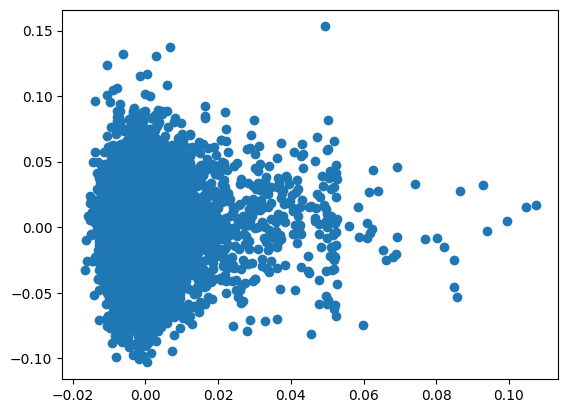

In [41]:
plt.scatter(img_feature_pca[:,1], text_feature_pca[:,1])

<Axes: >

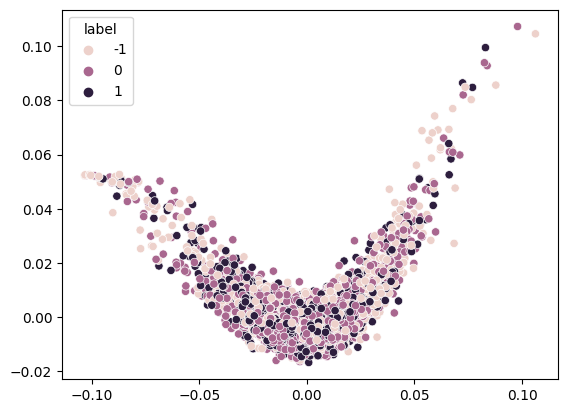

In [47]:
sns.scatterplot(x=img_feature_pca[:,0], y=img_feature_pca[:,1], hue=data['label'])

<Axes: >

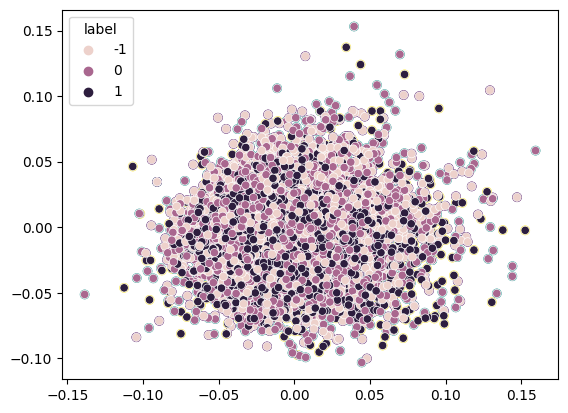

In [46]:
# plt.scatter(text_feature_pca[:,0], text_feature_pca[:,1], c=data['label'])
sns.scatterplot(x=text_feature_pca[:,0], y=text_feature_pca[:,1], hue=data['label'])